<a href="https://colab.research.google.com/github/anantha5ani/Coursera-Introduction-to-Python/blob/master/DeepLearningWithPython_Chapter5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 5 - Deep learning for computer vision

In [1]:
# set tensorflow to version 2
%tensorflow_version 2.x # run this step everytime the kernel is restarted
import tensorflow as tf

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x # run this step everytime the kernel is restarted`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


## 5.1 - Introduction to Covnets

In [0]:
# Instantiating a small covnet
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Adding a classifier on top of the covnet
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [0]:
# Training the covnet on MNIST images
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils    import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1687 - accuracy: 0.9474
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0463 - accuracy: 0.9855
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0321 - accuracy: 0.9903
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0246 - accuracy: 0.9926
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0193 - accuracy: 0.9939


In [0]:
## evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc # 99.32%

### Simple covnet works a lot better than Dense layer model we built earlier in chapter 2, with accuracy of 98%

313/313 [==============================] - 1s 2ms/step - loss: 0.0263 - accuracy: 0.9929


0.992900013923645

## 5.2 - Training a covnet from acratch on a small dataset

### Setup kaggle API in order to download data

In [0]:
! pip install -q kaggle

In [0]:
from google.colab import files

In [0]:
# files.upload() # this will provide an upload button where we upload the json file that kaggle gave us for API access. it will have username and key

In [0]:
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json

In [0]:
! kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge              COVID-19 Open Research Dataset Challenge (CORD-19)    2GB  2020-04-25 00:03:33          56640  
roche-data-science-coalition/uncover                           UNCOVER COVID-19 Challenge                          123MB  2020-04-08 22:04:30           5169  
praveengovi/coronahack-chest-xraydataset                       CoronaHack -Chest X-Ray-Dataset                       1GB  2020-03-20 01:26:40           1313  
katerpillar/meteonet                                           MeteoNet North-West France                           11GB  2020-04-16 08:35:45            102  
andrewmvd/covid19-ct-scans                    

### Download kaggle data using API and store it in google drive

In [4]:
### Uncomment blocks below if running for the first time - currently the datasets are already downloaded in place
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
### ensure to have accepted rules on kaggle website for the said competition/datasets
# ! kaggle competitions download -c dogs-vs-cats -p /content/gdrive/My\ Drive/kaggle/dogs-vs-cats

In [0]:
import os
os.chdir('gdrive/My Drive/kaggle/dogs-vs-cats')

In [0]:
### extract zip files into folders
# !mkdir train  #create a directory named train/
# !mkdir test  #create a directory named test/
# !unzip -q train.zip -d train/  #unzip data in train/
# !unzip -q test1.zip -d test/  #unzip data in test/

### Download kaggle data using API and store it in onedrive (experimental - not working)

In [0]:
!pip install "onedrivesdk<2"

     |████████████████████████████████| 204kB 9.1MB/s 
  Created wheel for onedrivesdk: filename=onedrivesdk-1.1.8-cp36-none-any.whl size=147153 sha256=ba0ff9a5947523e7785a3fc9ede7991c9763f6d5f40f458cee9b166601d52db1
  Stored in directory: /root/.cache/pip/wheels/8f/0c/f0/fe6e0677e05a8bfbd6c2b8d2034db9bcdc03f365545a990fff
Successfully built onedrivesdk


In [0]:
import onedrivesdk 

In [0]:
redirect_uri = 'http://localhost:8080/' 
client_secret = 'your_client_secret' 
client_id='your_client_id' 
api_base_url='https://api.onedrive.com/v1.0/' 
scopes=['wl.signin', 'wl.offline_access', 'onedrive.readwrite'] 
http_provider = onedrivesdk.HttpProvider()
auth_provider = onedrivesdk.AuthProvider( http_provider=http_provider, client_id=client_id, scopes=scopes) 
client = onedrivesdk.OneDriveClient(api_base_url, auth_provider, http_provider) 
auth_url = client.auth_provider.get_auth_url(redirect_uri) 

In [0]:
# Ask for the code 
print('Paste this URL into your browser, approve the app\'s access.') 
print('Copy everything in the address bar after "code=", and paste it below.') 
print(auth_url) 
code = input('Paste code here: ')  
client.auth_provider.authenticate(code, redirect_uri, client_secret)

Paste this URL into your browser, approve the app's access.
Copy everything in the address bar after "code=", and paste it below.
https://login.live.com/oauth20_authorize.srf?client_id=your_client_id&response_type=code&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=wl.signin+wl.offline_access+onedrive.readwrite


KeyboardInterrupt: ignored

### Final setup of folder structure for sample data - on google drive

In [0]:
# Copying images to training, validation, and test directories
### If running it for the first time then uncomment the commented lines of mkdir and file transfer

import os, shutil

outer_dir = os.getcwd()

### Path to the directory where the original dataset was uncompressed
original_dataset_dir = os.path.join(outer_dir, 'train/train')

### Directory where you'll store your smaller dataset
base_dir = os.path.join(outer_dir, 'keras_example')
# os.mkdir(base_dir)

### Directories for training, validation, and test splits
train_dir = os.path.join(base_dir, 'train_sample')
# os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation_sample')
# os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test_sample')
# os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
# os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
# os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
# os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
# os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
# os.mkdir(test_dogs_dir)

# fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#   src = os.path.join(original_dataset_dir, fname)
#   dst = os.path.join(train_cats_dir, fname)
#   shutil.copyfile(src, dst)

# fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#   src = os.path.join(original_dataset_dir, fname)
#   dst = os.path.join(validation_cats_dir, fname)
#   shutil.copyfile(src, dst)

# fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#   src = os.path.join(original_dataset_dir, fname)
#   dst = os.path.join(test_cats_dir, fname)
#   shutil.copyfile(src, dst)

# fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#   src = os.path.join(original_dataset_dir, fname)
#   dst = os.path.join(train_dogs_dir, fname)
#   shutil.copyfile(src, dst)

# fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#   src = os.path.join(original_dataset_dir, fname)
#   dst = os.path.join(validation_dogs_dir, fname)
#   shutil.copyfile(src, dst)

# fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#   src = os.path.join(original_dataset_dir, fname)
#   dst = os.path.join(test_dogs_dir, fname)
#   shutil.copyfile(src, dst)

In [0]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [0]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [0]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [0]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [0]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [0]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


### Continue with building the model

In [0]:
# Instantiating a small covnet for dogs vs. cats classification
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 128)      

In [0]:
# Configuring the model for training
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

### Data preprocessing

1. Read the picture files
2. Decode the JPEG content to RGB grids of pixels
3. Convert these into floating-point integers
4. Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values)

In [0]:
# Using ImageDataGenerator to read images from directories
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, # target directory
                                                    target_size=(150, 150), # resizes all images to 150 X 150
                                                    batch_size=20, 
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
## checking for first iteration to see the batch size
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [0]:
# Fitting the model using a batch generator
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 927s 9s/step - loss: 0.6890 - acc: 0.5435 - val_loss: 0.6738 - val_acc: 0.5900
Epoch 2/30
100/100 [==============================] - 12s 124ms/step - loss: 0.6605 - acc: 0.6035 - val_loss: 0.6664 - val_acc: 0.5780
Epoch 3/30
100/100 [==============================] - 12s 121ms/step - loss: 0.6169 - acc: 0.6460 - val_loss: 0.6292 - val_acc: 0.6410
Epoch 4/30
100/100 [==============================] - 12s 122ms/step - loss: 0.5758 - acc: 0.6965 - val_loss: 0.5964 - val_acc: 0.6880
Epoch 5/30
100/100 [==============================] - 12s 124ms/step - loss: 0.5519 - acc: 0.7185 - val_loss: 0.6142 - val_acc: 0.6530
Epoch 6/30
100/100 [==============================] - 12s 122ms/step - loss: 0.5220 - acc: 0.7370 - val_loss: 0.5539 - val_acc: 0.7120
Epoch 7/30
100/100 [==============================] - 12s 123ms/step - loss: 0.4953 - acc: 0.7535 - val_loss: 0.5636 - val_acc: 0.7130
Epoch 8/30
100/100 [==============================] - 12s

In [0]:
# Saving the model
model.save(os.path.join(base_dir,'cats_and_dogs_small_1.h5'))

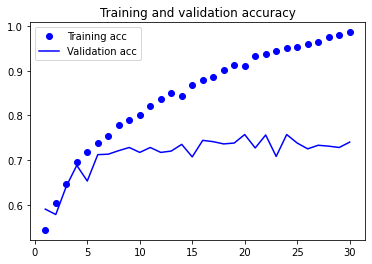

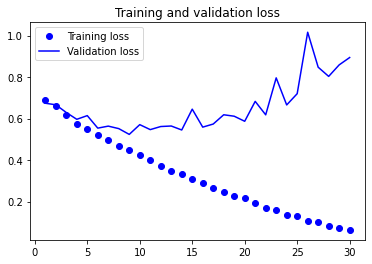

In [0]:
# Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

These plots are characteristic of overfitting. The training accuracy increases linearly
over time, until it reaches nearly 100%, whereas the validation accuracy stalls at 70–72%.
The validation loss reaches its minimum after only five epochs and then stalls, whereas
the training loss keeps decreasing linearly until it reaches nearly 0.
Because you have relatively few training samples (2,000), overfitting will be your
number-one concern. You already know about a number of techniques that can help
mitigate overfitting, such as dropout and weight decay (L2 regularization). We’re now
going to work with a new one, specific to computer vision and used almost universally
when processing images with deep-learning models: data augmentation.

### Using data augmentation

In [0]:
# Setting up a data augmentation configuration via ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

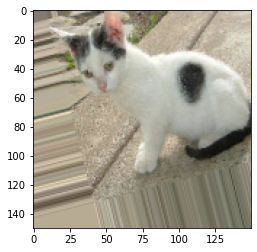

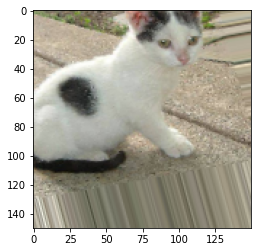

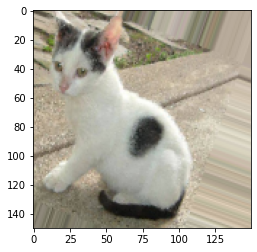

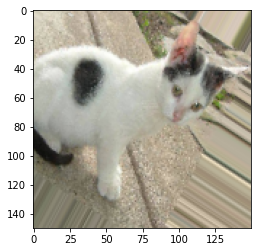

In [0]:
# Displaying some randomly augmented training images
from tensorflow.keras.preprocessing import image # module with image processing utilities
import matplotlib.pyplot as plt

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3] # chooses one image to augment

img = image.load_img(img_path, target_size=(150, 150)) # reads the image and resizes it

x = image.img_to_array(img) # Converts it to Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape) # reshapes it to (1, 150, 150, 3)

## Generates batches of randomly transformed images. 
## Loops indefinitely, so you need to break the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break

plt.show()

In [0]:
# Defining a new convnet that includes dropout
from tensorflow.keras import models, layers, optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # additional dropout layer
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [0]:
# Training the convnet using data-augmentation generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='binary')

history = model.fit(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
100/100 [==============================] - 818s 8s/step - loss: 0.6914 - acc: 0.5248 - val_loss: 0.6888 - val_acc: 0.5216
Epoch 2/100
100/100 [==============================] - 30s 299ms/step - loss: 0.6787 - acc: 0.5679 - val_loss: 0.6841 - val_acc: 0.5419
Epoch 3/100
100/100 [==============================] - 30s 303ms/step - loss: 0.6719 - acc: 0.5879 - val_loss: 0.6450 - val_acc: 0.6288
Epoch 4/100
100/100 [==============================] - 30s 301ms/step - loss: 0.6565 - acc: 0.6083 - val_loss: 0.6403 - val_acc: 0.6057
Epoch 5/100
100/100 [==============================] - 30s 304ms/step - loss: 0.6415 - acc: 0.6281 - val_loss: 0.7093 - val_acc: 0.5577
Epoch 6/100
100/100 [==============================] - 30s 300ms/step - loss: 0.6252 - acc: 0.6477 - val_loss: 0.6264 - val_acc: 0.6405
Epoch 7/100
100/100 [=====

In [0]:
# Saving the model
model.save(os.path.join(base_dir,'cats_and_dogs_small_2.h5'))

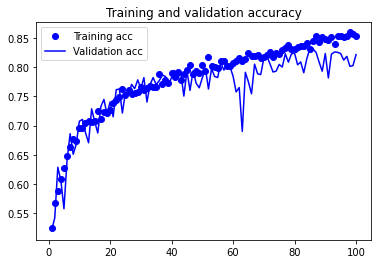

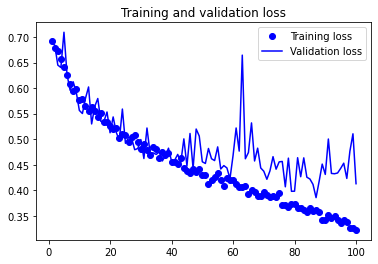

In [0]:
# Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
os.getcwd()

'/content/gdrive/My Drive/kaggle/dogs-vs-cats'

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 128)      

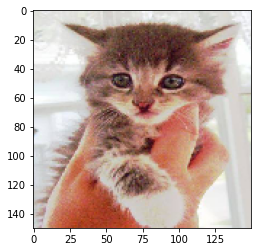

In [0]:
# Displaying one image and checking the prediction
from tensorflow.keras.preprocessing import image # module with image processing utilities
import matplotlib.pyplot as plt

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[100] # chooses one image to augment

img = image.load_img(img_path, target_size=(150, 150)) # reads the image and resizes it


imgplot = plt.imshow(img)

plt.show()

In [0]:
x = image.img_to_array(img) # Converts it to Numpy array with shape (150, 150, 3)
print(x.shape)
x = x.reshape((1,) + x.shape) # reshapes it to (1, 150, 150, 3)
print(x.shape)
model.predict(x) # not working

(150, 150, 3)
(1, 150, 150, 3)


array([[1.]], dtype=float32)

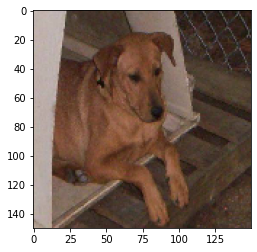

In [0]:
# Displaying one image and checking the prediction
from tensorflow.keras.preprocessing import image # module with image processing utilities
import matplotlib.pyplot as plt

fnames = [os.path.join(train_dogs_dir, fname) for fname in os.listdir(train_dogs_dir)]

img_path = fnames[100] # chooses one image to augment

img = image.load_img(img_path, target_size=(150, 150)) # reads the image and resizes it


imgplot = plt.imshow(img)

plt.show()

In [0]:
x2 = image.img_to_array(img) # Converts it to Numpy array with shape (150, 150, 3)
x2 = x2.reshape((1,) + x2.shape) # reshapes it to (1, 150, 150, 3)

model.predict(x2) # not working

array([[1.]], dtype=float32)

## 5.3 - Using a pretrained convnet

### Feature extraction method

In [2]:
# Instantiating the VGG16 convolutional base
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 1s 0us/step


In [3]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [7]:
# Extracting features using the pretrained convolutional base
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

outer_dir = os.getcwd()

### Directory where there is your smaller dataset
base_dir = os.path.join(outer_dir, 'keras_example')

train_dir = os.path.join(base_dir, 'train_sample')
validation_dir = os.path.join(base_dir, 'validation_sample')
test_dir = os.path.join(base_dir, 'test_sample')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(directory,
                                        target_size=(150, 150),
                                        batch_size=batch_size,
                                        class_mode='binary')
  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= sample_count:
      break
  return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

## Flatten them to feed into dense layer next
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
# Defining and training the densely connected classifier
from tensorflow.keras import models, layers, optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 0s 5ms/step - loss: 0.5949 - acc: 0.6685 - val_loss: 0.4426 - val_acc: 0.8280
Epoch 2/30
100/100 [==============================] - 0s 4ms/step - loss: 0.4138 - acc: 0.8295 - val_loss: 0.3603 - val_acc: 0.8640
Epoch 3/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3507 - acc: 0.8530 - val_loss: 0.3235 - val_acc: 0.8670
Epoch 4/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3099 - acc: 0.8680 - val_loss: 0.2967 - val_acc: 0.8830
Epoch 5/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2830 - acc: 0.8915 - val_loss: 0.2842 - val_acc: 0.8890
Epoch 6/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2608 - acc: 0.8990 - val_loss: 0.2716 - val_acc: 0.8920
Epoch 7/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2394 - acc: 0.9075 - val_loss: 0.2635 - val_acc: 0.8930
Epoch 8/30
100/100 [==============================] - 0s 4ms/step - loss: 0.

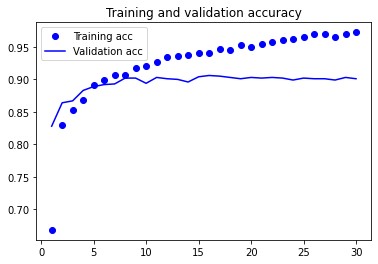

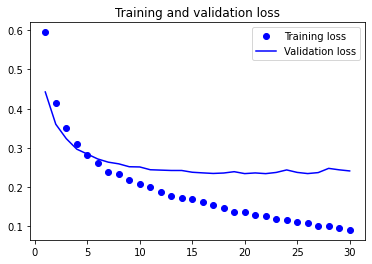

In [9]:
# Plotting the results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

We have 90% accuracy right at the beginnig, better than earlier models. But it is overfitting

### Pretrained network with data augmentation

In [11]:
# Adding a densely connected classifier on top of the convolutional base
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [12]:
## In Keras, you freeze a network by setting its trainable attribute to False:
print('This is the number of trainable weights '
'before freezing the conv base:', len(model.trainable_weights))

conv_base.trainable = False

print('This is the number of trainable weights '
'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


In [16]:
# Training the model end to end with a frozen convolutional base
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 22s 219ms/step - loss: 0.2717 - acc: 0.8850 - val_loss: 0.2455 - val_acc: 0.8890
Epoch 2/30
100/100 [==============================] - 22s 216ms/step - loss: 0.2659 - acc: 0.8835 - val_loss: 0.2344 - val_acc: 0.9010
Epoch 3/30
100/100 [==============================] - 22s 216ms/step - loss: 0.2732 - acc: 0.8835 - val_loss: 0.2421 - val_acc: 0.9000
Epoch 4/30
100/100 [==============================] - 22s 217ms/step - loss: 0.2791 - acc: 0.8780 - val_loss: 0.2361 - val_acc: 0.9080
Epoch 5/30
100/100 [==============================] - 21s 213ms/step - loss: 0.2698 - acc: 0.8905 - val_loss: 0.2391 - val_acc: 0.8970
Epoch 6/30
100/100 [==============================] - 22s 219ms/step - loss: 0.2750 - acc: 0.8780 - val_loss: 0.2502 - val_acc: 0.9040
Epoch 7/30
100/100 [==============================] - 22s 221ms/step - loss: 0.2763 - acc: 0.8830 - val_lo

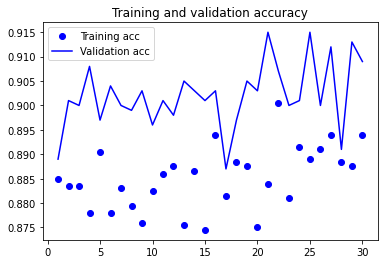

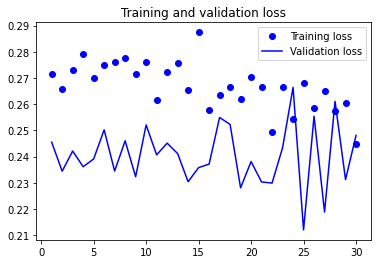

In [17]:
# Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Fine tuning method

Steps to fine tuning
1. Add your custom network on top of an already-trained base network.
2. Freeze the base network.
3. Train the part you added.
4. Unfreeze some layers in the base network.
5. Jointly train both these layers and the part you added.

In [18]:
# Resume from step 4, as step 3 is completed as part of previous feature extraction training
## reminder of the base model
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [0]:
## Layers up to block4_pool should be frozen, block4 should be trainable
# Freezing all layers up to a specific one

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [20]:
# Fine-tuning the model
## we use low learning rate in order to limit the magnitude of change on already trained layers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/100
100/100 [==============================] - 21s 213ms/step - loss: 0.2664 - acc: 0.8885 - val_loss: 0.2065 - val_acc: 0.9060
Epoch 2/100
100/100 [==============================] - 22s 216ms/step - loss: 0.2483 - acc: 0.8870 - val_loss: 0.2481 - val_acc: 0.9030
Epoch 3/100
100/100 [==============================] - 22s 216ms/step - loss: 0.2473 - acc: 0.9000 - val_loss: 0.2001 - val_acc: 0.9200
Epoch 4/100
100/100 [==============================] - 22s 219ms/step - loss: 0.2178 - acc: 0.9130 - val_loss: 0.2424 - val_acc: 0.9030
Epoch 5/100
100/100 [==============================] - 22s 217ms/step - loss: 0.1937 - acc: 0.9185 - val_loss: 0.1979 - val_acc: 0.9260
Epoch 6/100
100/100 [==============================] - 21s 215ms/step - loss: 0.1831 - acc: 0.9270 - val_loss: 0.2895 - val_acc: 0.9020
Epoch 7/100
100/100 [==============================] - 21s 213ms/step - loss: 0.1866 - acc: 0.9290 - val_loss: 0.1800 - val_acc: 0.9240
Epoch 8/100
100/100 [===========================

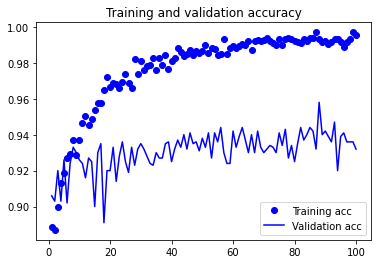

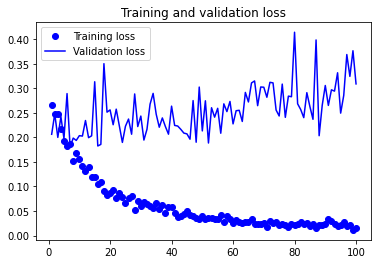

In [21]:
# Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

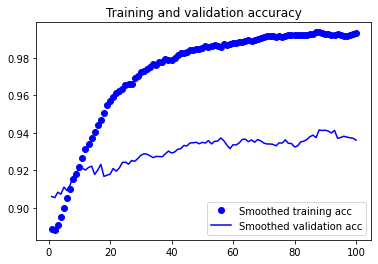

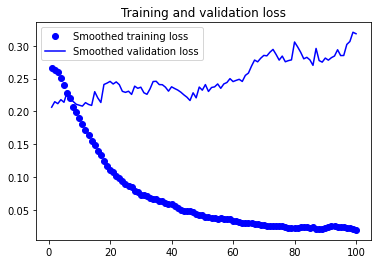

In [22]:
# Smoothing the plots, since it is noisy
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs, 
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs, 
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [24]:
# Evaluate the model on test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 4s 80ms/step - loss: 0.3356 - acc: 0.9380
test acc: 0.9380000233650208


## 5.4 - Visualizing what convnets learn